In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors 

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#k-fold cross validation
K = 5

### Генерация данных

In [4]:
classification_problem = datasets.make_classification(n_samples=150, n_features =2, n_informative = 2, 
                                                      n_classes = 4, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [5]:
colors = ListedColormap(['red', 'blue', 'yellow', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'lightgreen'])

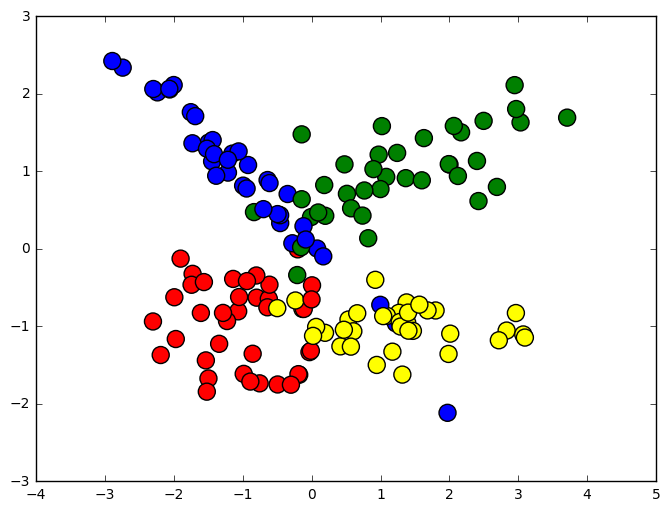

In [6]:
pylab.figure(figsize=(8,6))
pylab.scatter([*map(lambda x: x[0], classification_problem[0])], [*map(lambda x: x[1], classification_problem[0])], 
              c=classification_problem[1], cmap=colors, s=150)

In [7]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 1.0 / K,
                                                                                     random_state = 1)

### Разделяющая поверхность

In [8]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [9]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 150, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 150, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

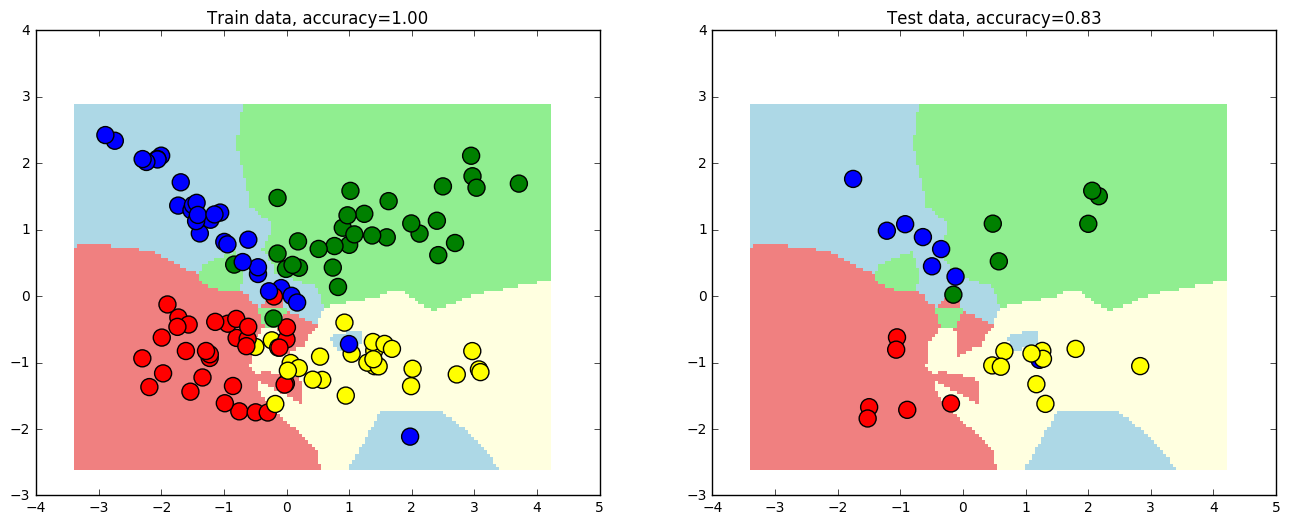

In [10]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

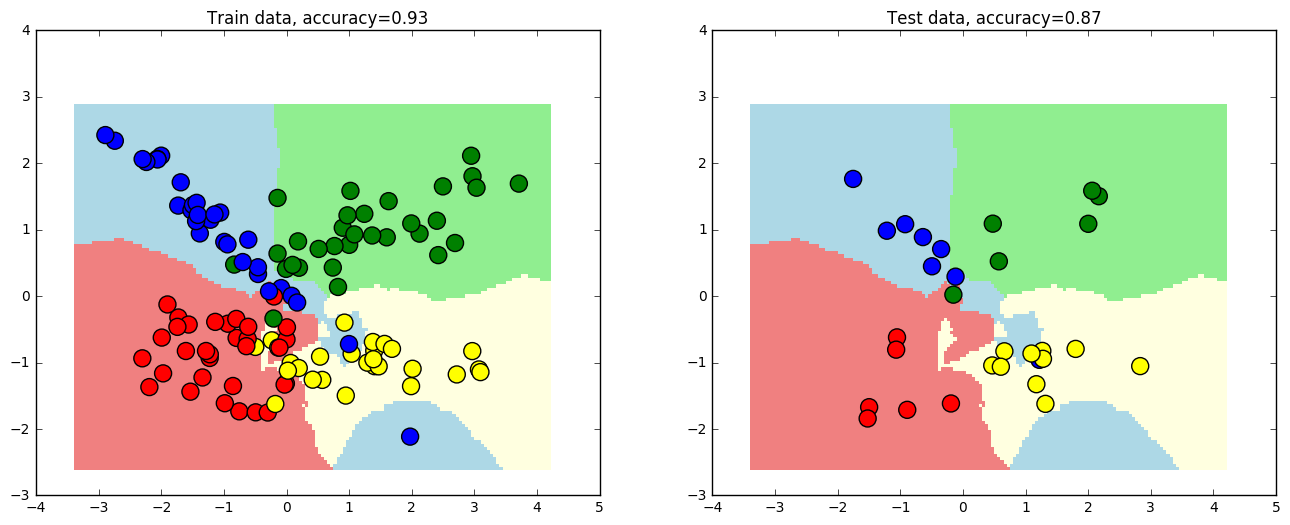

In [11]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

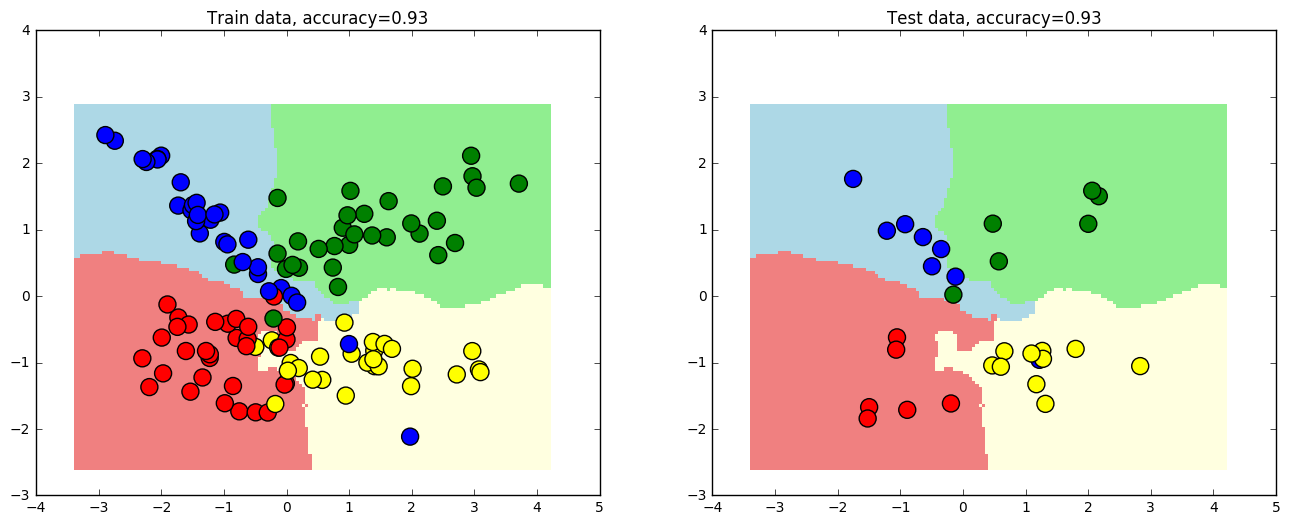

In [12]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

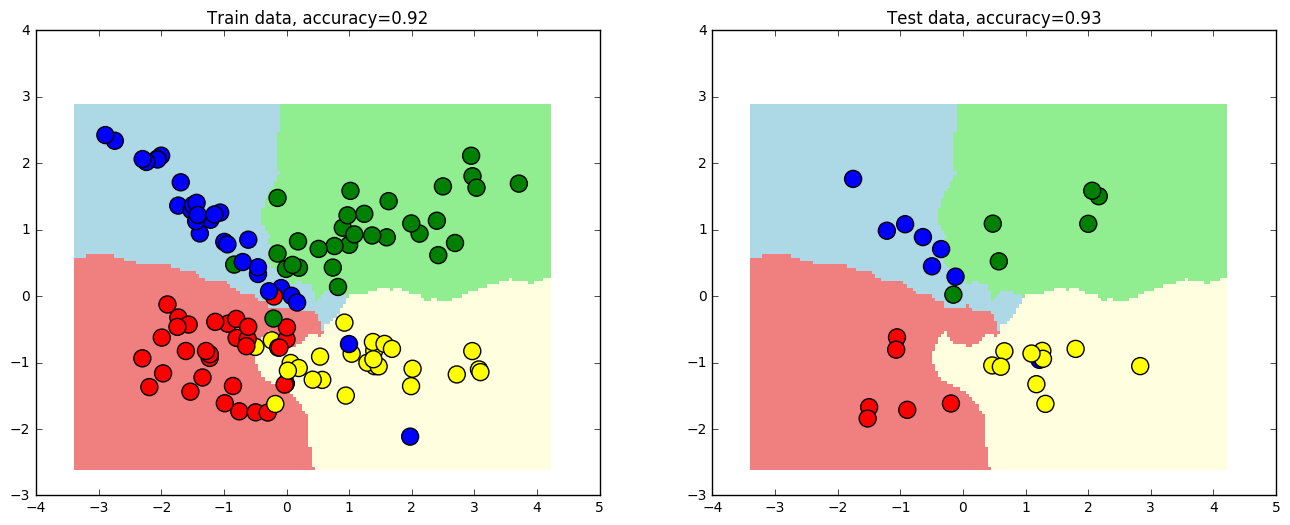

In [13]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

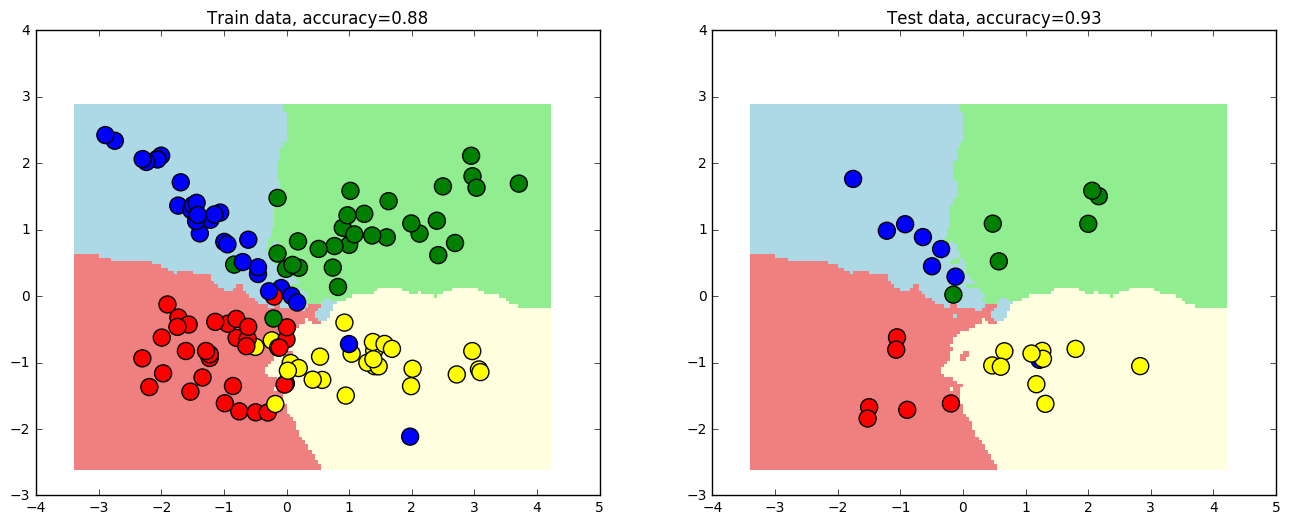

In [14]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

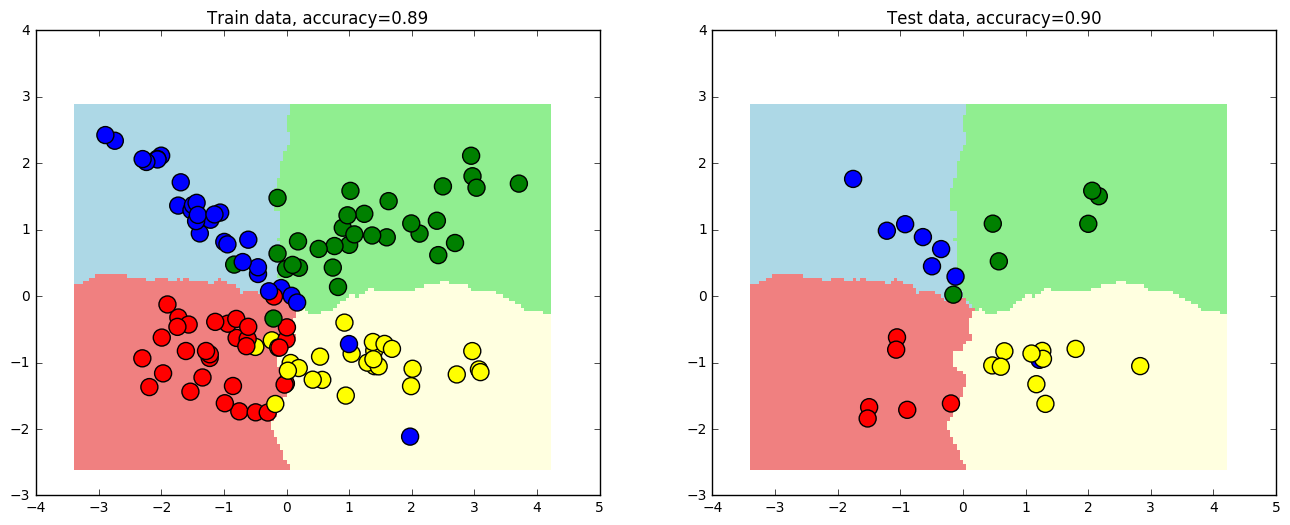

In [15]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

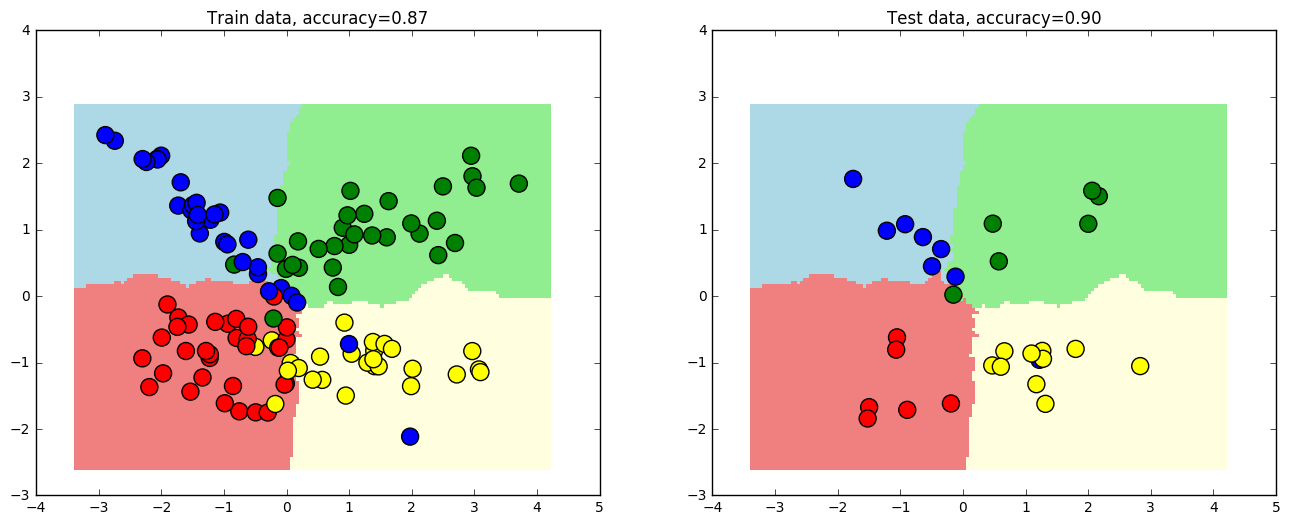

In [16]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

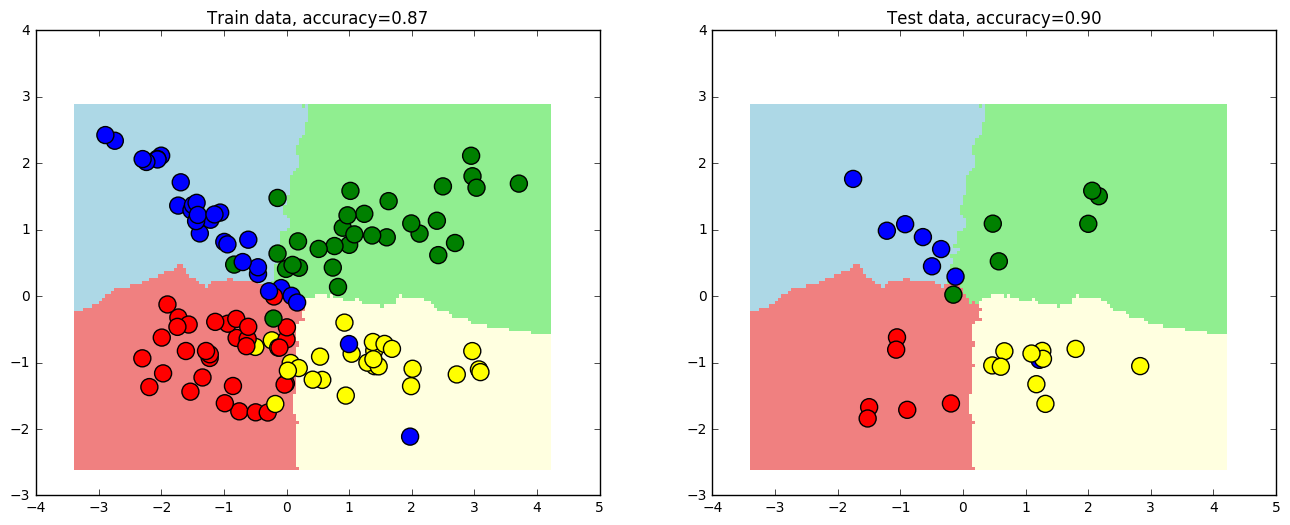

In [17]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=40)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

### График зависимости accuracy в кросс-валидации от k

In [18]:
def get_accuracy(k):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_data, train_labels)
    predictions = clf.predict(test_data)
    return metrics.accuracy_score(test_labels, predictions)

In [19]:
ks = range(1, 40)
accuracy = np.array([get_accuracy(i) for i in ks])

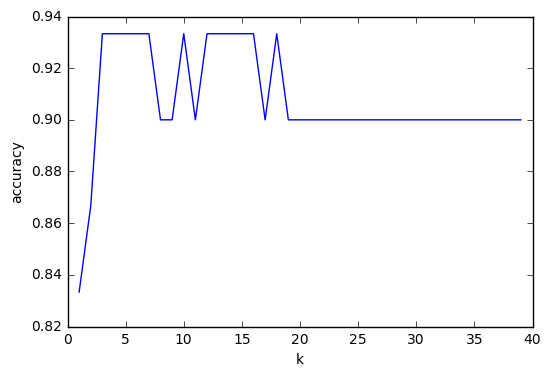

In [20]:
plt.plot(ks, accuracy)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()